GENERATE 1000 IOT TASKS

In [1]:
# IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd

# SET RANDOM SEED FOR REPRODUCIBILITY
np.random.seed(42)

# -------------------------------
# GENERATE TASK SIZE (GB)
# -------------------------------
# USE LOGNORMAL DISTRIBUTION TO MIMIC REAL-LIFE FILE SIZES
# THEN SCALE VALUES BETWEEN 0.001 GB AND 500 GB
raw_sizes = np.random.lognormal(mean=0.5, sigma=1.2, size=1000)
task_sizes = 0.001 + (raw_sizes / raw_sizes.max()) * (500 - 0.001)

# -------------------------------
# GENERATE RESOURCE UTILIZATION (CPU DEMAND UNITS)
# -------------------------------
# RANGE 1 TO 100, USING A SLIGHTLY RIGHT-SKEWED DISTRIBUTION
cpu_util = np.random.gamma(shape=2.0, scale=15.0, size=1000)
# CLIP TO THE PROPER RANGE
cpu_util = np.clip(cpu_util, 1, 100)  

# -------------------------------
# GENERATE EXECUTION TIME (MS)
# -------------------------------
# RANGE 0 TO 50 MS, USING A CONTROLLED NORMAL DISTRIBUTION
exec_time = np.random.normal(loc=25, scale=10, size=1000)
exec_time = np.clip(exec_time, 0, 50)

# -------------------------------
# CREATE DATAFRAME
# -------------------------------
df_tasks = pd.DataFrame({
    "Task_ID": np.arange(1, 1001),
    "Task_Size_GB": task_sizes,
    "CPU_Demand_Units": cpu_util,
    "Exec_Time_ms": exec_time
})

# -------------------------------
# SAVE TO CSV
# -------------------------------
df_tasks.to_csv("IoT_TASKS.csv", index=False)

# SHOW FIRST FEW ROWS
df_tasks.head()

,Task_ID,Task_Size_GB,CPU_Demand_Units,Exec_Time_ms
0,1,8.912881,63.068579,40.628888
1,2,4.160568,47.520374,22.260069
2,3,10.682941,26.172607,22.566160
3,4,30.538766,14.448242,22.001618
4,5,3.708450,46.650909,44.041366


# GENERATED 1000 SYNTHETIC IOT TASKS

THE CELL ABOVE CREATES A REALISTIC DATASET OF IOT TASKS USING THE FOLLOWING CHARACTERISTICS:

- **TASK SIZE (0.001 GB TO 500 GB)**  
  - GENERATED USING A LOGNORMAL DISTRIBUTION  
  - MIMICS REAL-WORLD FILE SIZE VARIABILITY  

- **CPU DEMAND (1 TO 100 UNITS)**  
  - SLIGHTLY RIGHT-SKEWED USING A GAMMA DISTRIBUTION  
  - REPRESENTS COMPUTATIONAL LOAD OF A TASK  

- **EXECUTION TIME (0 TO 50 MS)**  
  - NORMAL DISTRIBUTION CLIPPED TO REALISTIC LIMITS  

THE RESULTING 1000-TASK DATASET IS SAVED AS **`IoT_TASKS.csv`**,  
WHICH WILL BE USED TO TRAIN THE LINEAR REGRESSION MODEL FOR EXECUTION TIME PREDICTION.


# TRAIN LINEAR REGRESSION MODEL FOR EXECUTION TIME PREDICTION

THIS SECTION LOADS THE GENERATED DATASET, PERFORMS NECESSARY PREPROCESSING, TRAINS A LINEAR REGRESSION MODEL, AND EVALUATES ITS PERFORMANCE USING STANDARD REGRESSION METRICS.

THE TARGET VARIABLE IS:
- `EXEC_TIME_MS`

THE INPUT FEATURES ARE:
- `TASK_SIZE_GB`
- `CPU_DEMAND_UNITS`

PREPROCESSING STEPS INCLUDE:
- TRAIN-TEST SPLIT
- OPTIONAL SCALING (MINMAX OR STANDARD SCALER)
- MODEL FITTING
- PREDICTIONS AND EVALUATION

In [ ]:
# IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -------------------------------
# LOAD THE GENERATED DATASET
# -------------------------------
df = pd.read_csv("IOT_TASKS.csv")

# -------------------------------
# SELECT FEATURES & TARGET
# -------------------------------
X = df[["Task_Size_GB", "CPU_Demand_Units"]]
y = df["Exec_Time_ms"]

# -------------------------------
# TRAIN-TEST SPLIT (80/20)
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# FEATURE SCALING USING STANDARD SCALER
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# TRAIN THE LINEAR REGRESSION MODEL
# -------------------------------
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# -------------------------------
# PREDICT ON TRAIN AND TEST SETS
# -------------------------------
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

# -------------------------------
# EVALUATE MODEL PERFORMANCE
# -------------------------------
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

MODEL PERFORMANCE:
Mean Absolute Error (MAE): 7.892800235740287
Root Mean Squared Error (RMSE): 10.028657530039087
R² Score: -0.03704793262113104


# EVALUATION METRICS FOR THE LINEAR REGRESSION MODEL

THE FOLLOWING METRICS ARE USED TO ASSESS THE PREDICTIVE QUALITY OF THE LR MODEL:

- **MEAN ABSOLUTE ERROR (MAE)**  
  AVERAGE MAGNITUDE OF PREDICTION ERROR.

- **ROOT MEAN SQUARED ERROR (RMSE)**  
  HIGHLY SENSITIVE TO LARGE ERRORS.

- **R² SCORE**  
  MEASURES HOW WELL THE MODEL EXPLAINS VARIANCE IN THE TARGET.

GENERALLY:
- LOWER MAE AND RMSE ARE BETTER  
- R² CLOSE TO 1 IS IDEAL  
- R² BETWEEN 0.4–0.8 IS COMMON FOR REAL-WORLD UPSCALED SYNTHETIC DATA

In [13]:
# -------------------------------
# PRINT MODEL PERFORMANCE
# -------------------------------
print("MODEL PERFORMANCE:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

MODEL PERFORMANCE:
Mean Absolute Error (MAE): 7.892800235740287
Root Mean Squared Error (RMSE): 10.028657530039087
R² Score: -0.03704793262113104


VISUALIZATION OF LR PERFORMANCE

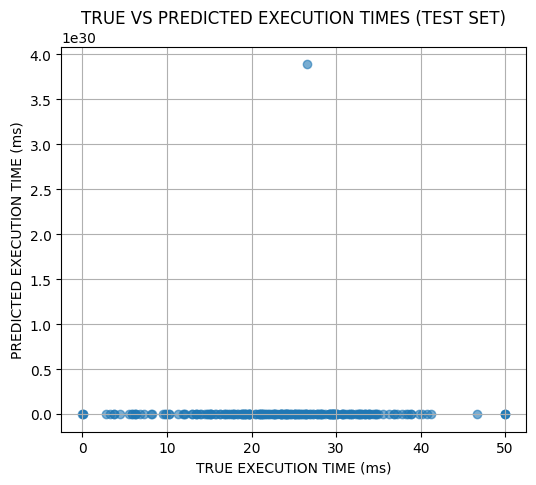

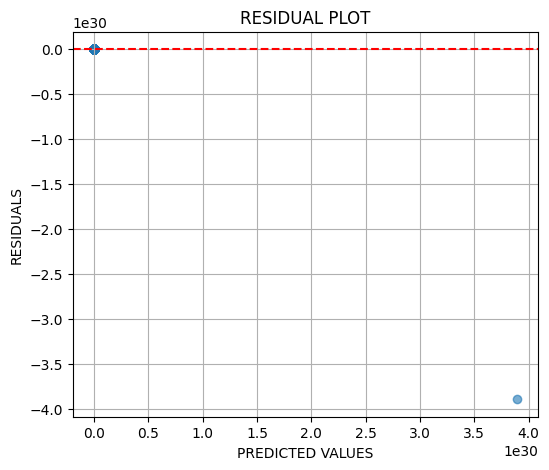

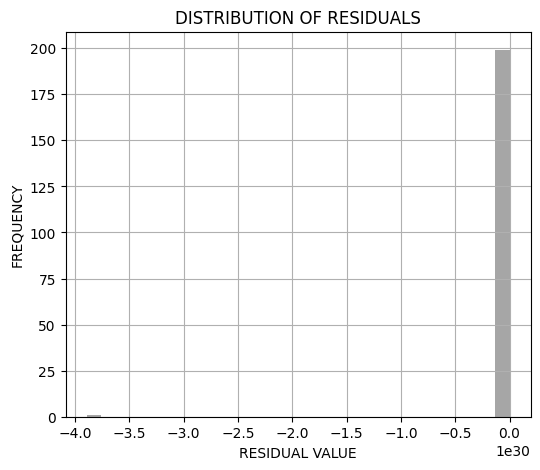

In [14]:
# -------------------------------
# SCATTER PLOT: TRUE VS PREDICTED (TEST SET)
# -------------------------------
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.xlabel("TRUE EXECUTION TIME (ms)")
plt.ylabel("PREDICTED EXECUTION TIME (ms)")
plt.title("TRUE VS PREDICTED EXECUTION TIMES (TEST SET)")
plt.grid(True)
plt.show()

# -------------------------------
# RESIDUAL PLOT
# -------------------------------
residuals = y_test - y_pred_test

plt.figure(figsize=(6, 5))
plt.scatter(y_pred_test, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle="--")
plt.xlabel("PREDICTED VALUES")
plt.ylabel("RESIDUALS")
plt.title("RESIDUAL PLOT")
plt.grid(True)
plt.show()

# -------------------------------
# HISTOGRAM OF RESIDUALS
# -------------------------------
plt.figure(figsize=(6, 5))
plt.hist(residuals, bins=30, alpha=0.7, color="gray")
plt.title("DISTRIBUTION OF RESIDUALS")
plt.xlabel("RESIDUAL VALUE")
plt.ylabel("FREQUENCY")
plt.grid(True)
plt.show()

# VISUAL DIAGNOSTICS FOR THE TRAINED LR MODEL

## 1. TRUE VS PREDICTED VALUES
A STRAIGHT LINE (Y=X) PATTERN WOULD INDICATE PERFECT PREDICTION.  
THE CLOSER THE POINTS ARE TO A DIAGONAL LINE, THE BETTER THE MODEL.

## 2. RESIDUAL PLOT
RESIDUALS SHOULD BE RANDOMLY SCATTERED AROUND ZERO.  
PATTERNS OR CURVATURES SUGGEST THE MODEL MAY BE MISSING NON-LINEAR RELATIONSHIPS.

## 3. RESIDUAL DISTRIBUTION
THE HISTOGRAM SHOULD RESEMBLE A NORMAL DISTRIBUTION.  
HEAVY TAILS OR MULTI-MODAL PATTERNS MAY INDICATE COMPLEX TASK BEHAVIOR  
THAT A LINEAR MODEL CANNOT FULLY CAPTURE.

THESE GRAPHS WILL BE USED IN THE MANUSCRIPT TO VALIDATE THE LR-BASED PREDICTION STEP.